# Math 638 Homework 4
Geneva Porter, 22 February 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1 (4.3.3)

$$
\dot{\theta}=\mu\sin(\theta)-\sin(2\theta)
$$

#### Fixed Points

The equation above has a varying amount of fixed points for $\dot{\theta}=0$ depending on the parameter $\mu$.  Reworking the equation, we get:

$$
\begin{align} 
0 ~ & = ~ \mu\sin(\theta)-\sin(2\theta) \\
& = ~ \mu\sin(\theta)-2\sin(\theta)\cos(\theta) \\
& = ~ \sin(\theta)(\mu-2\cos(\theta)) \\
\end{align}
$$

$$
\sin(\theta)=0 ~~~~~\text{or} ~~~~~ \mu-2\cos(\theta)=0
$$

We can see that $\theta=0$ and $\theta=\pi$ will always be fixed points regardless of the value of $\mu$ (for simplicity, we are restricting our solutions to $0\leq\theta<2\pi$). Fixed points will also occur when $\theta=\cos^{-1}\left(\frac{\mu}{2}\right)$. This indicates that there are two additional fixed points when $-2\leq r\leq2$. We can see the fixed point distribution by mapping $\theta$ as a function of $\mu$, as seen in the bifurcation diagram below. 

#### Bifurcations 

We can see that there is a repeating pattern of subcritical pitchfork bifurcations, with $-pi<\theta<2\pi$ shown to better visualize this pattern. Each bifurcation happens at $\mu=\pm2$. We can verify this bifurcation type by examining the normal form of $\dot{\theta}$ through Taylor expansion then non-dimensionalization. Let $\theta=\tilde{\theta}\theta_s$ and $t=\tau t_s$. The we have:

$$
\begin{align} 
\frac{d\theta}{dt} ~ & = ~ \mu\sin(\theta)-\sin(2\theta)  \\
& ~ = ~ \mu\left(\theta+\frac{\theta^3}{3!}+\mathcal{O}(\theta^5)\right)-\left(2\theta+\frac{(2\theta)^3}{3!}+\mathcal{O}(\theta^5)\right) \\
& ~ = ~ (\mu-2)\theta+\frac{\mu-8}{6}\theta^3+\mathcal{O}(\theta^5)  ~~~\longrightarrow \\
\frac{d\tilde{\theta}}{d\tau}\cdot\frac{\theta_s}{t_s}& = ~ (\mu-2)\tilde{\theta}\theta_s+\frac{\mu-8}{6}\tilde{\theta}^3\theta_s^3+\mathcal{O}(\tilde{\theta}^5) \\
\frac{d\tilde{\theta}}{d\tau} & = ~ (\mu-2)\tilde{\theta}t_s+\frac{\mu-8}{6}\tilde{\theta}^3\theta_s^2t_s+\mathcal{O}(\tilde{\theta}^5) \\
\end{align}
$$

Letting $t_s=\frac{6}{\theta_s^2(\mu-8)}$ and $\theta_s=1$, we have

$$
\begin{align} 
\frac{d\tilde{\theta}}{d\tau} & = ~ \frac{6(\mu-2)}{\mu-8} \tilde{\theta}t_s+\tilde{\theta}^3+\mathcal{O}(\tilde{\theta}^5) \\
\end{align}
$$

So $\ddot{\tilde{\theta}}\approx r\tilde{\theta}+\tilde{\theta}^3$ with $r=\frac{6(\mu-2)}{\mu-8}$, which is the normal form for subcritical pitchfork bifurcation. Note that $r$ is positive for both bifurcation values at $\mu=\pm2$.

Problem 4.3.3


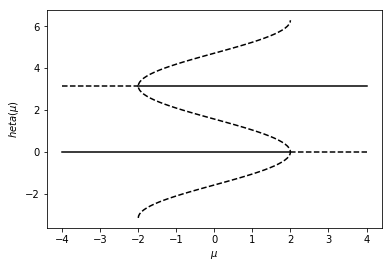

In [17]:
theta = np.linspace(-np.pi, np.pi*2,100)
mu = 2*np.cos(theta)

plt.plot(mu,theta,color='k',ls='--')
plt.plot([-4,2],[0,0],color='k')
plt.plot([2,4],[0,0],color='k',ls='--')
plt.plot([-4,-2],[np.pi,np.pi],color='k',ls='--')
plt.plot([-2,4],[np.pi,np.pi],color='k')

plt.xlabel('$\mu$')
plt.ylabel('$\theta(\mu)$')
print 'Problem 4.3.3'

## Problem 2 (4.3.10)

In deriving the square-root scaling law for the time spent passing through a bottleneck, we assumed that $\dot{x}$ had a quadratic minimum. This is the generic case, but what if the minimum were of a higher order? Suppose that the bottleneck is governed by $\dot{x}=r+x^{2n}$, where $n>1$ is an integer. Show that $T_{bottleneck}\approx cr^b$, and determine $b$ and $c$.




#### Solution

To find the amount of time the system spends in the bottleneck, we find $x(t)$ and solve for $t$. If $\dot{x}=r+x^{2n}$, then:

$$ \frac{dx}{dt}=r+x^{2n} ~~~ \longrightarrow ~~~ dt=\frac{dx}{r+x^{2n}}$$

$$
\text{So} ~~~ T_{bottleneck}=\int_{-\infty}^\infty\frac{dx}{r+x^{2n}}
$$

Using partial fraction differentiation to seperate complex roots, we get:

$$
T_{bottleneck}=\frac{1}{2ir^{\frac{1}{2n}}}\int_{-\infty}^\infty\frac{1}{x-ir^{\frac{1}{2n}}}-\frac{1}{x+ir^{\frac{1}{2n}}}dx
$$


Using Cauchy's residue theorem, we can evaluate this integral around the boundary $\gamma$ of the pie-slice $\{z=re^{i\theta}:0\leq\theta\leq\frac{\pi}{n},0\leq r\leq R\}$. This gives us:

$$\oint_\gamma f(x)dx=2\pi i\sum Res(f,ir^{\frac{1}{2n}})=2\pi i\cdot \frac{1}{2ir^{\frac{1}{2n}}}=\pi r^{-\frac{1}{2n}}
$$

So $c=\pi$ and $b=-\frac{1}{2n}$

## Problem 3 (4.4.1)

Find the conditions under which it is valid to approximate the equation $mL^2\ddot{\theta}+b\dot{\theta}+mgL\sin\theta=\Gamma$ by its overdampened limit $b\dot{\theta}+mgL\sin\theta=\Gamma$.


#### Solution

We can negate the $\ddot{\theta}$ term if our time scales show us that the parameter relationships push $\ddot{\theta}$ to zero. By definition $overdampened$ implies a large dampening constant $b$, so one of the conditions for validity is $b>>1$. We can verify this by scaling the above equation with respect to $t$. Let $t=\tau t_s$. Then:

$$
\frac{mL^2}{t_s}^2\frac{d^2\theta}{d\tau^2}+\frac{b}{t_s}\frac{d\theta}{d\tau}+mgL\sin\theta=\Gamma
$$

If we divide both sides by $mgL$ and set $t_s=\frac{b}{mgL}$, we get:

$$
\frac{m^2g^2L^3}{b^2}\ddot{\theta}+\dot{\theta}+sin\theta=\frac{\Gamma}{mgL}
$$

It is reasonable to say that with a large $b$ value, the $\ddot{\theta}$ term can be discarded. More specifically, when $m^2g^2L^3<<b^2$, we can use the overdampened limit approximation.

## Problem 4 (5.2.2)

$$
\dot{x}=x-y ~~~~~\dot{y}=x+y
$$

### a) Find $A$ and show that is has eigenvalues $\lambda_1=1+i$, $\lambda_2=1-i$, with eigenvectors $\vec{v_1}=(i,1)$, $\vec{v_2}=(-i,1)$.

We can write $\dot{\vec{x}}=A\vec{x}$ when:

$$
A=\left(\begin{array}{cc}
1 & -1 \\
1 & 1 \\
\end{array}\right)
~~~~~\text{and}~~~~~ \vec{x}=\left(\begin{array}{c}
x \\
y \\
\end{array}\right)
$$

To find the eigenvalues, we solve $\left|J-\lambda I\right|=0$, where $J$ is the Jacobian matrix of $\dot{\vec{x}}$. 

$$
\left|\left(\begin{array}{cc}
\frac{d \dot{x}}{dx} & \frac{d \dot{x}}{dy} \\
\frac{d \dot{y}}{dx} & \frac{d \dot{y}}{dy} \\
\end{array}\right)-I\lambda\right|=\left|\begin{array}{cc}
1-\lambda & -1 \\
1 & 1-\lambda \\
\end{array}\right|=(1-\lambda)(1-\lambda)-(-1)(1)=\lambda^2-2\lambda+2=0
$$

$$
\longrightarrow ~~~ \lambda=\frac{-(-2)\pm\sqrt{(-2)^2-4(1)(2)}}{2(1)}=1\pm i
$$

So $\lambda_1=1+i$ and $\lambda_2=1-i$.

To find the eigenvectors $\vec{Q_i}$, we solve $A\vec{Q_i}=\lambda_i\vec{Q_i}$. Starting with $Q_1$ and $\lambda_1$, this gives us:

$$
\left(\begin{array}{cc}
1 & -1 \\
1 & 1 \\
\end{array}\right)\left(\begin{array}{c}
q_1 \\
q_2 \\
\end{array}\right)=(1+i)\left(\begin{array}{c}
q_1 \\
q_2 \\
\end{array}\right) ~~~ \longrightarrow
$$

$$
\left(\begin{array}{c}
q_1-q_2 \\
q_1+q_2 \\
\end{array}\right)=\left(\begin{array}{c}
q_1+ iq_1 \\
q_2+iq_2 \\
\end{array}\right) ~~~ \longrightarrow
$$

$$
q_1-q_2=q_1+iq_1 ~~~ \text{and} ~~~ q_1+q_2=q_2+iq_2
$$

So $q_2=-iq_1$, giving us $Q_1=(1,-i)^T$. Repeating this process for $\lambda_2$ yields $Q_2=(1,i)^T$ as our second eigenvector.

### b) The general solution is $\vec{x}(t)=c_1e^{\lambda_1t}\vec{v_1}+c_2e^{\lambda_2t}\vec{v_2}$. Express $\vec{x}(t)$ purely in terms of real valued functions.

$$
\begin{align}
\vec{x}(t) ~ & = ~ c_1e^{(1+i)t}\vec{v_1}+c_2e^{(1-i)t}\vec{v_2} \\
& = ~ c_1e^t(\cos{t}+i\sin{t})\vec{v_1}+c_2e^t(\cos{t}-i\sin{t})\vec{v_2} \\
& = ~ e^t\cos{t}(c_1\vec{v_1}+c_2\vec{v_2})+i e^t\sin{t}(c_1\vec{v_1}-c_2\vec{v_2})
\end{align}
$$

## Problem 5 (5.2.11)

Show that any matrix of the form $A=\left(\begin{array}{cc}
\lambda & b \\
0 & \lambda \\
\end{array}\right)$, with $b\neq 0$ has only a one-dimensional eigenspace corresponding to the eigenvalue $\lambda$. Then solve the system, $\dot{\vec{x}}=A\vec{x}$ and sketch the phase portrait.

Since $A$ is an upper triangular matrix, its eigenvalues are just the diagonal values, so $A$ has an eigenvalue of $\lambda$ with multiplicity 2. We can verify this by calculating the determinant when equal to zero:

$$
(\lambda)(\lambda)-

Problem 5.2.11


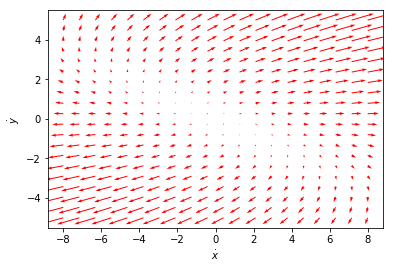

In [28]:
lambd=1
b=2

def f(A, t):
    xval, yval = A
    return [lambd*xval+b*yval, lambd*yval]

xval = np.linspace(-8, 8, 20)
yval = np.linspace(-5, 5, 20)

A1, A2 = np.meshgrid(xval, yval)

t = 0

u, v = np.zeros(A1.shape), np.zeros(A2.shape)

NI, NJ = A1.shape

for i in range(NI):
    for j in range(NJ):
        x = A1[i, j]
        y = A2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

plt.quiver(A1, A2, u, v, color='r')
plt.xlabel('$\dot{x}$')
plt.ylabel('$\dot{y}$')
print 'Problem 5.2.11'

## Problem 6 (5.2.13)

cos



































